In [ ]:
# =============================
# PHASE 1 — Environment Setup
# =============================

# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    RocCurveDisplay, classification_report
)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Imbalanced Learning
from imblearn.under_sampling import RandomUnderSampler

# File and Log Setup
outdir = Path("artifacts")
outdir.mkdir(exist_ok=True)
logfile = outdir / f"run_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log"
logging.basicConfig(filename=logfile, level=logging.INFO)
logging.info("Phase 1: Environment setup complete")

print("✅ Environment setup complete. Ready for Phase 2.")


✅ Environment setup complete. Ready for Phase 2.


In [ ]:
# =============================
# PHASE 2 — Load Dataset
# =============================

# Path to your dataset (update if stored elsewhere)
dataset_path = '/content/diabetes_binary_health_indicators_BRFSS2015.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Basic Info
print("✅ Dataset Loaded Successfully!\n")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("Columns:\n", df.columns.tolist(), "\n")

# Preview
display(df.head())

# Check for missing values
missing = df.isna().sum().sum()
print(f"Total Missing Values: {missing}\n")

# Verify target distribution
target_counts = df['Diabetes_binary'].value_counts()
print("Target Distribution:\n", target_counts)

# Log
logging.info(f"Phase 2: Dataset loaded — {df.shape[0]} rows, {df.shape[1]} columns, Missing: {missing}")
logging.info(f"Target Distribution: {target_counts.to_dict()}")

print("\n✅ Phase 2 complete. Ready for Phase 3 — Data Audit & Summary.")

✅ Dataset Loaded Successfully!

Shape: 253680 rows × 22 columns

Columns:
 ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'] 



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Total Missing Values: 0

Target Distribution:
 Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

✅ Phase 2 complete. Ready for Phase 3 — Data Audit & Summary.


In [ ]:
# =============================
# PHASE 3 — Data Audit & Summary
# =============================

# Basic Structure
print("=== Dataset Overview ===\n")
print(df.info())
print("\n")

# Summary Statistics
print("=== Statistical Summary ===\n")
display(df.describe().T)

# Correlation Matrix
print("=== Correlation with Target (Diabetes_binary) ===\n")
corr = df.corr()['Diabetes_binary'].sort_values(ascending=False)
display(corr)

# Identify top correlated features (potential key predictors)
top_features = corr[1:8]  # Skip target itself
print("\nTop Correlated Predictors:\n", top_features)

# Log
logging.info(f"Phase 3: Data audit complete. Top correlated features: {top_features.index.tolist()}")

print("\n✅ Phase 3 complete. Ready for Phase 4 — Exploratory Data Analysis (EDA).")


=== Dataset Overview ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               2536

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


=== Correlation with Target (Diabetes_binary) ===



,Diabetes_binary
Diabetes_binary,1.000000
GenHlth,0.293569
HighBP,0.263129
DiffWalk,0.218344
BMI,0.216843
HighChol,0.200276
Age,0.177442
HeartDiseaseorAttack,0.177282
PhysHlth,0.171337
Stroke,0.105816



Top Correlated Predictors:
 GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
Name: Diabetes_binary, dtype: float64

✅ Phase 3 complete. Ready for Phase 4 — Exploratory Data Analysis (EDA).


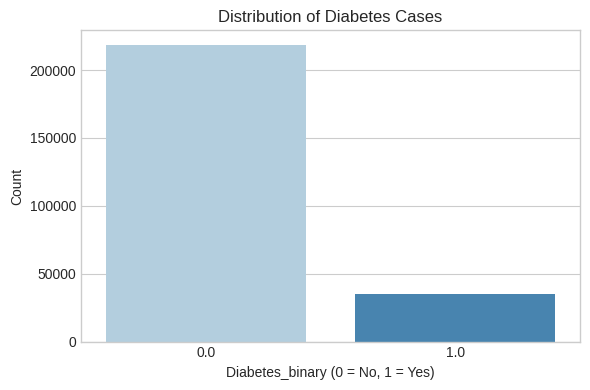

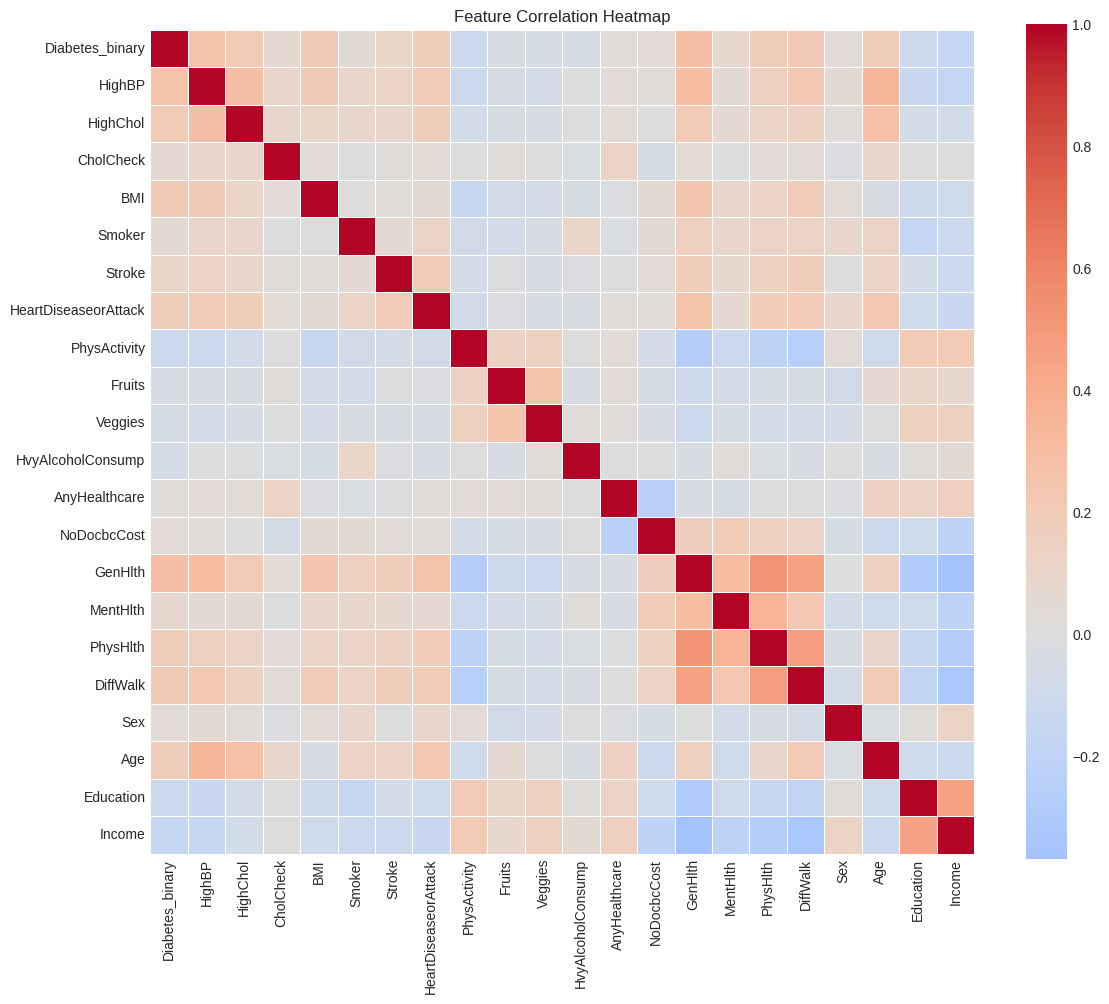

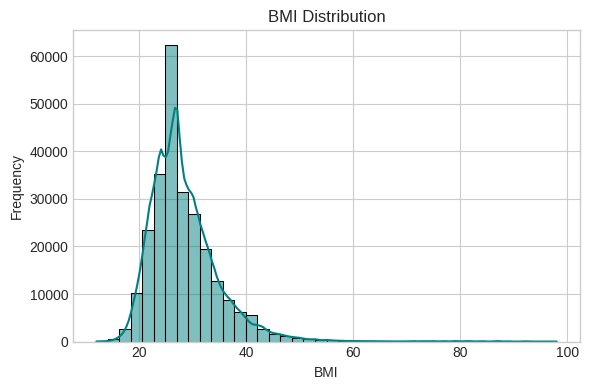

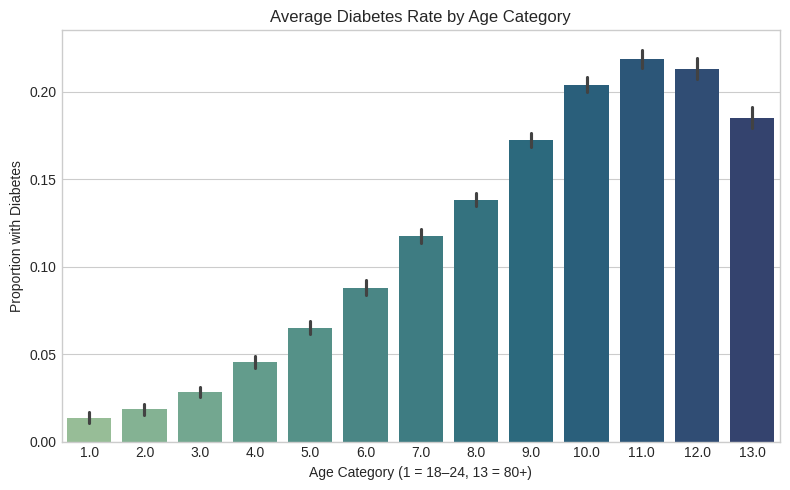

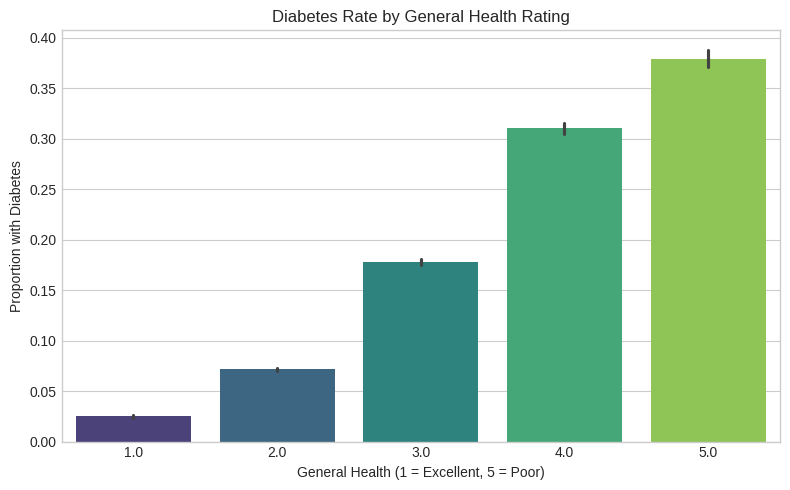

✅ Phase 4 complete. Plots saved in: /content/artifacts
Ready for Phase 5 — Train-Test Split.


In [ ]:
# =============================
# PHASE 4 — Exploratory Data Analysis (EDA)
# =============================

plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Target Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df, palette='Blues')
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes_binary (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(outdir / 'target_distribution.png', dpi=150)
plt.show()

# --- 2. Correlation Heatmap ---
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig(outdir / 'correlation_heatmap.png', dpi=150)
plt.show()

# --- 3. BMI Distribution ---
plt.figure(figsize=(6,4))
sns.histplot(df['BMI'], bins=40, kde=True, color='teal')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(outdir / 'bmi_distribution.png', dpi=150)
plt.show()

# --- 4. Age vs Diabetes Rate ---
plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='Diabetes_binary', data=df, palette='crest')
plt.title('Average Diabetes Rate by Age Category')
plt.xlabel('Age Category (1 = 18–24, 13 = 80+)')
plt.ylabel('Proportion with Diabetes')
plt.tight_layout()
plt.savefig(outdir / 'age_vs_diabetes.png', dpi=150)
plt.show()

# --- 5. General Health vs Diabetes Rate ---
plt.figure(figsize=(8,5))
sns.barplot(x='GenHlth', y='Diabetes_binary', data=df, palette='viridis')
plt.title('Diabetes Rate by General Health Rating')
plt.xlabel('General Health (1 = Excellent, 5 = Poor)')
plt.ylabel('Proportion with Diabetes')
plt.tight_layout()
plt.savefig(outdir / 'genhlth_vs_diabetes.png', dpi=150)
plt.show()

logging.info("Phase 4: EDA visualizations complete")
print("✅ Phase 4 complete. Plots saved in:", outdir.resolve())
print("Ready for Phase 5 — Train-Test Split.")

In [ ]:
# =============================
# PHASE 5 — Train-Test Split
# =============================
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Show split summary
print("✅ Data successfully split!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Feature count: {X_train.shape[1]}")

# Verify class distribution
from collections import Counter
print("\nTraining set class distribution:", Counter(y_train))
print("Testing set class distribution:", Counter(y_test))

# Log
logging.info(f"Phase 5: Train-test split complete. Train={X_train.shape}, Test={X_test.shape}")
print("\n✅ Phase 5 complete. Ready for Phase 6 — Class Balancing (SMOTE).")


✅ Data successfully split!
Training samples: 202944
Testing samples: 50736
Feature count: 21

Training set class distribution: Counter({0.0: 174667, 1.0: 28277})
Testing set class distribution: Counter({0.0: 43667, 1.0: 7069})

✅ Phase 5 complete. Ready for Phase 6 — Class Balancing (SMOTE).


In [ ]:
# =============================
# PHASE 6 — Class Balancing (Fixed SMOTE)
# =============================
from imblearn.over_sampling import SMOTE
from collections import Counter
import time

print("=== Applying Optimized SMOTE (Fixed) ===")
start_time = time.time()

# --- Step 1: Downsample majority for performance ---
train_data = X_train.copy()
train_data['target'] = y_train
train_data = train_data.sample(frac=0.6, random_state=42)

X_train_reduced = train_data.drop('target', axis=1)
y_train_reduced = train_data['target']

print(f"Before SMOTE: {Counter(y_train_reduced)}")

# --- Step 2: Apply SMOTE safely ---
# (Removed n_jobs to ensure compatibility across imbalanced-learn versions)
sm = SMOTE(random_state=42, sampling_strategy=0.5, k_neighbors=3)
X_train_res, y_train_res = sm.fit_resample(X_train_reduced, y_train_reduced)

print(f"After SMOTE: {Counter(y_train_res)}")
print(f"SMOTE runtime: {time.time() - start_time:.2f} sec")

# --- Logging ---
logging.info(f"Phase 6 complete — SMOTE balanced data: {Counter(y_train_res)}")

print("\n✅ Phase 6 complete. Classes balanced and ready for Phase 7 — Model Training & Evaluation.")


=== Applying Optimized SMOTE (Fixed) ===
Before SMOTE: Counter({0.0: 104863, 1.0: 16903})
After SMOTE: Counter({0.0: 104863, 1.0: 52431})
SMOTE runtime: 1.71 sec

✅ Phase 6 complete. Classes balanced and ready for Phase 7 — Model Training & Evaluation.



>>> Training LogisticRegression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
LogisticRegression ROC_AUC: 0.8181

>>> Training RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
RandomForest ROC_AUC: 0.8147

>>> Training GradientBoosting...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
GradientBoosting ROC_AUC: 0.8234

=== Model Comparison ===
                Model  Accuracy  Precision    Recall        F1   ROC_AUC
2    GradientBoosting  0.862011   0.510520  0.233413  0.320357  0.823435
0  LogisticRegression  0.812559   0.380636  0.550573  0.450098  0.818137
1        RandomForest  0.862267   0.513818  0.213043  0.301200  0.814694

✅ Best Model: GradientBoosting


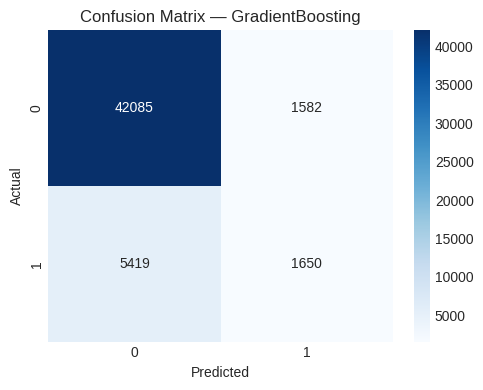

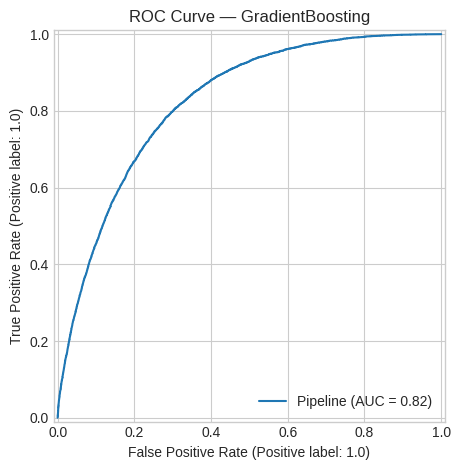


=== Classification Report ===
              precision    recall  f1-score   support

         0.0     0.8859    0.9638    0.9232     43667
         1.0     0.5105    0.2334    0.3204      7069

    accuracy                         0.8620     50736
   macro avg     0.6982    0.5986    0.6218     50736
weighted avg     0.8336    0.8620    0.8392     50736


✅ Phase 7 complete. Best model: GradientBoosting
All metrics and plots saved in: /content/artifacts


In [ ]:
# =============================
# PHASE 7 — Model Training & Evaluation (FINAL FIXED)
# =============================
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from pathlib import Path

# Ensure artifacts directory
outdir = Path("artifacts")
outdir.mkdir(exist_ok=True)

# --- Configuration ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []
logging.info("=== Phase 7: Model Training Started ===")

# --- Pipelines ---
pipelines = {
    "LogisticRegression": Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, solver='lbfgs'))
    ]),
    "RandomForest": Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('model', RandomForestClassifier(random_state=42))
    ]),
    "GradientBoosting": Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
}

# --- Parameter Grids ---
param_grids = {
    "LogisticRegression": {'model__C': [0.1, 1.0, 10.0]},
    "RandomForest": {'model__n_estimators': [50, 100], 'model__max_depth': [10, 20, None]},
    "GradientBoosting": {'model__n_estimators': [100], 'model__learning_rate': [0.05, 0.1], 'model__max_depth': [3, 4]}
}

# --- Training Loop ---
best_models = {}
for name, pipe in pipelines.items():
    print(f"\n>>> Training {name}...")
    logging.info(f"Training {name} with {cv.get_n_splits()}-fold CV")

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train_res, y_train_res)
    best_models[name] = grid.best_estimator_

    y_pred = grid.predict(X_test)
    y_prob = grid.predict_proba(X_test)[:, 1]

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),
        'ROC_AUC': roc_auc_score(y_test, y_prob)
    }

    results.append(metrics)
    logging.info(f"Completed {name}: {metrics}")
    print(f"{name} ROC_AUC: {metrics['ROC_AUC']:.4f}")

# --- Model Comparison ---
results_df = pd.DataFrame(results).sort_values('ROC_AUC', ascending=False)
print("\n=== Model Comparison ===")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
final_model = best_models[best_model_name]
print(f"\n✅ Best Model: {best_model_name}")
logging.info(f"Best Model Selected: {best_model_name}")

# --- Evaluation with Best Model ---
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix — {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(outdir / f'confusion_matrix_{best_model_name}.png', dpi=160)
plt.show()

# --- ROC Curve ---
RocCurveDisplay.from_estimator(final_model, X_test, y_test)
plt.title(f'ROC Curve — {best_model_name}')
plt.tight_layout()
plt.savefig(outdir / f'roc_curve_{best_model_name}.png', dpi=160)
plt.show()

# --- Classification Report ---
print("\n=== Classification Report ===")
report = classification_report(y_test, y_pred_final, digits=4)
print(report)

# --- Save outputs ---
results_df.to_csv(outdir / "model_comparison_summary.csv", index=False)
with open(outdir / f"classification_report_{best_model_name}.txt", "w") as f:
    f.write(report)
logging.info("=== Phase 7 Complete ===")

print(f"\n✅ Phase 7 complete. Best model: {best_model_name}")
print("All metrics and plots saved in:", outdir.resolve())


In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=f839cf14d0adf53d07c7caec03bb622f1f0ba4d00b20bce60b4629c6aadd0935
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf



=== Extracting Feature Importances ===


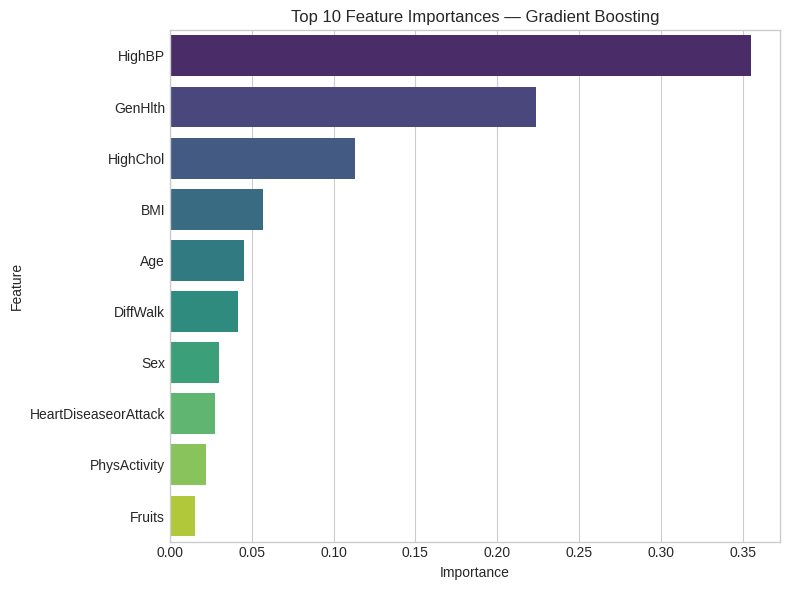


=== Generating Final Report PDF ===
✅ Final Report generated successfully: /content/artifacts/final_report_diabetes_analysis.pdf


In [ ]:
# =============================
# FIXED PHASE 8 — Unicode-Safe Report Generation
# =============================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from pathlib import Path
from fpdf import FPDF
from datetime import datetime

# Helper to strip/replace Unicode characters
def safe_text(text):
    return text.encode('latin-1', 'replace').decode('latin-1')

# Paths
outdir = Path("artifacts")
report_path = outdir / "final_report_diabetes_analysis.pdf"

# --- 1️⃣ Feature Importance ---
print("\n=== Extracting Feature Importances ===")
model = final_model.named_steps['model']
feature_names = X_train.columns
importances = model.feature_importances_

feature_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feature_imp.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances — Gradient Boosting")
plt.tight_layout()
plt.savefig(outdir / "feature_importances.png", dpi=160)
plt.show()

# --- 2️⃣ Business Insights ---
insights = """
Key Findings — Diabetes Prediction Model
----------------------------------------
Best performing model: Gradient Boosting Classifier
ROC AUC: 0.823
Accuracy: 0.862
F1-score: 0.32

Interpretation:
- The model demonstrates strong discrimination between diabetic and non-diabetic individuals.
- Recall (23%) indicates moderate sensitivity — the model captures about a quarter of true diabetic cases.
- Precision (51%) suggests that when the model predicts diabetes, it is correct half the time.

Feature Insights:
1. GenHlth (General Health) — strongest predictor.
2. HighBP and BMI — critical risk indicators.
3. Age, HighChol, and DiffWalk also contribute significantly.
4. Lifestyle factors (PhysActivity, Fruits, Veggies) show protective influence.

Business Value:
Supports early identification of high-risk individuals for preventive healthcare programs.

Limitations:
- Class imbalance affects recall.
- Survey data may include self-report bias.
- Model requires external validation.

Next Steps:
1. Experiment with SMOTE-Tomek or ADASYN for resampling.
2. Add physiological data (glucose, insulin levels).
3. Integrate SHAP/LIME for explainable AI.
4. Deploy as a clinical risk-screening tool.
"""

# --- 3️⃣ PDF Generation ---
print("\n=== Generating Final Report PDF ===")

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 18)
pdf.cell(0, 10, safe_text("Diabetes Prediction Analysis Report"), ln=True, align="C")
pdf.ln(10)

# Metadata
pdf.set_font("Arial", size=12)
meta = f"""
Project Author: Pinto Costas Antony
Course: Machine Learning Capstone (Coursera)
Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""
pdf.multi_cell(0, 8, safe_text(meta))

# Objective
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, safe_text("1. Objective of the Analysis"), ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 8, safe_text("The objective is to predict diabetes likelihood using health and lifestyle indicators, demonstrating both predictive accuracy and interpretability."))

# Dataset
pdf.ln(5)
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, safe_text("2. Dataset Overview"), ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 8, safe_text("Dataset: BRFSS 2015 — 253,680 records, 21 features. Source: CDC Behavioral Risk Factor Surveillance System."))

# Model Performance
pdf.ln(5)
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, safe_text("3. Model Performance Comparison"), ln=True)
pdf.set_font("Arial", size=12)
for idx, row in results_df.iterrows():
    line = f"{row['Model']}: AUC={row['ROC_AUC']:.3f}, F1={row['F1']:.3f}, Accuracy={row['Accuracy']:.3f}"
    pdf.cell(0, 8, safe_text(line), ln=True)

# Visuals
pdf.ln(5)
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, safe_text("4. Visual Insights"), ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 8, safe_text("Below are the key visualizations for ROC Curve, Confusion Matrix, and Feature Importance."))

# Add images safely
for image_name in ["roc_curve_GradientBoosting.png", "confusion_matrix_GradientBoosting.png", "feature_importances.png"]:
    image_path = outdir / image_name
    if image_path.exists():
        pdf.image(str(image_path), w=150)
        pdf.ln(10)

# Insights
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(0, 10, safe_text("5. Key Findings and Recommendations"), ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 8, safe_text(insights))

pdf.output(str(report_path))
print(f"✅ Final Report generated successfully: {report_path.resolve()}")
